In [2]:
import os
# os.environ['DEVICE_ID'] = '0'
import numpy as np
import mindspore as ms
from mindspore import nn
from mindspore import context
context.set_context(mode=context.GRAPH_MODE, device_target="Ascend")

x = np.arange(-5, 5, 0.3)[:32].reshape((32, 1))
y = -5 * x + 0.1 * np.random.normal(loc=0.0, scale=20.0, size=x.shape)

net = nn.Dense(1, 1)
loss_fn = nn.loss.MSELoss()

opt = nn.optim.SGD(net.trainable_params(), learning_rate=0.01)
with_loss = nn.WithLossCell(net, loss_fn)
train_step = nn.TrainOneStepCell(with_loss, opt).set_train()

for epoch in range(20):
 loss = train_step(ms.Tensor(x, ms.float32), ms.Tensor(y, ms.float32))
 print('epoch: {0}, loss is {1}'.format(epoch, loss))

epoch: 0, loss is 184.11433
epoch: 1, loss is 132.19307
epoch: 2, loss is 95.23044
epoch: 3, loss is 68.916824
epoch: 4, loss is 50.18421
epoch: 5, loss is 36.848503
epoch: 6, loss is 27.354843
epoch: 7, loss is 20.596327
epoch: 8, loss is 15.784952
epoch: 9, loss is 12.359745
epoch: 10, loss is 9.92135
epoch: 11, loss is 8.185457
epoch: 12, loss is 6.9496784
epoch: 13, loss is 6.069932
epoch: 14, loss is 5.4436436
epoch: 15, loss is 4.9977865
epoch: 16, loss is 4.6803827
epoch: 17, loss is 4.4544234
epoch: 18, loss is 4.293563
epoch: 19, loss is 4.1790476


In [3]:
wb = [x.asnumpy() for x in net.trainable_params()]
w, b = np.squeeze(wb[0]), np.squeeze(wb[1])
print('The true linear function is y = -5 * x + 0.1')
print('The trained linear model is y = {0} * x + {1}'.format(w, b))
for i in range(-10, 11, 5):
 print('x = {0}, predicted y = {1}'.format(i, net(ms.Tensor([[i]], ms.float32))))


The true linear function is y = -5 * x + 0.1
The trained linear model is y = -4.647040367126465 * x + 0.2355716973543167
x = -10, predicted y = [[46.70598]]
x = -5, predicted y = [[23.470774]]
x = 0, predicted y = [[0.2355717]]
x = 5, predicted y = [[-22.999632]]
x = 10, predicted y = [[-46.234833]]


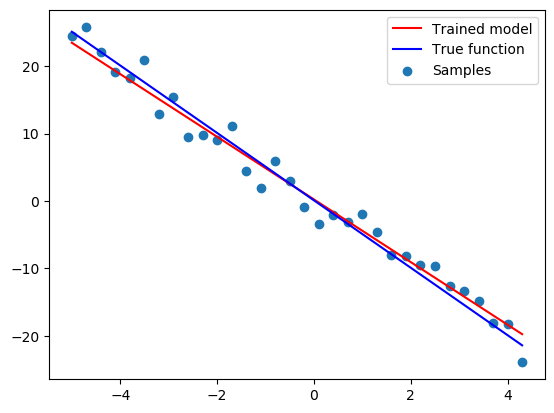

In [5]:
from matplotlib import pyplot as plt
plt.scatter(x, y, label='Samples')
plt.plot(x, w * x + b, c='r', label='Trained model')
plt.plot(x, -5 * x + 0.1, c='b', label='True function')
plt.legend()
plt.show()